In [60]:
"""Apply Linear Regression to a real-world application. You can create your own data or obtain it from internet resources. Implement the following operations:
1.	Apply Linear Regression to single predictor (40%). 
a)	Estimate coefficients of the model and RSS
b)	Assessing the Accuracy of the Coefficient Estimates: SE and confidence interval with 95% probability.
c)	Hypothesis testing. Calculate t – statistic and p-value.
d)	Assess the Overall Accuracy of the Model: RSE, R- squared and correlation (r)

-------------------------------------------------------

2.	Apply Linear Regression to multiple predictors (40%). 
a)	Is at least one of the predictors X1, X2, …, Xp useful in predicting the response?
b)	Do all the predictors help to explain Y, or is only a subset of the predictors useful?
c)	How well does the model fit the data?
d)	Given a set of predictor values, what response value should we predict, and how accurate is our prediction? 
e)	Analyze Interactions between qualitative and quantitative Variables
f)	Analyze non-linear effects of predictors. 
"""

"""
Usefulness of Predictors: You can look at the p-values of the coefficients to assess the significance of each predictor. A low p-value (< 0.05) suggests that the predictor is statistically significant in explaining the target variable.
Subset of Useful Predictors: Techniques like backward elimination, forward selection, or even regularization methods (not covered in this simple implementation) can help identify a useful subset of predictors.
Model Fit: R-squared and adjusted R-squared values give you an idea of how well the model fits the data. A higher R-squared value indicates a better fit.
Predicting Response Values: The predict method can be used to predict response values for a given set of predictors. The standard error and confidence intervals can help assess the accuracy of these predictions.
Interactions and Non-linear Effects: The fit_interactions and fit_polynomial methods can be used to explore interactions between variables and non-linear effects of predictors on the response."""

'\nUsefulness of Predictors: You can look at the p-values of the coefficients to assess the significance of each predictor. A low p-value (< 0.05) suggests that the predictor is statistically significant in explaining the target variable.\nSubset of Useful Predictors: Techniques like backward elimination, forward selection, or even regularization methods (not covered in this simple implementation) can help identify a useful subset of predictors.\nModel Fit: R-squared and adjusted R-squared values give you an idea of how well the model fits the data. A higher R-squared value indicates a better fit.\nPredicting Response Values: The predict method can be used to predict response values for a given set of predictors. The standard error and confidence intervals can help assess the accuracy of these predictions.\nInteractions and Non-linear Effects: The fit_interactions and fit_polynomial methods can be used to explore interactions between variables and non-linear effects of predictors on th

In [61]:
import re
import pandas as pd
import numpy as np


In [62]:
df = pd.read_csv('binaaz_train.csv')

In [63]:
df.head()

,_id,title,price,price_currency,poster,poster_type,Ünvan,description,Yeniləndi,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,latitude,longitude,seher
0,6,"Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.",300000,AZN,Mubariz,vasitəçi (agent),"Bakı şəhəri, Bakıxanov küçəsi",Təcili Satılır...Qaz Kupça var..\nRoseville...,05 Fevral 2021,5 / 17,135 m²,3,var,yoxdur,\nGənclik m.\nRespublika stadionu \nNərimanov ...,40.400420,49.851554,baki
1,22,"Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...",153000,AZN,Самир Ахмедов,vasitəçi (agent),"Bakı şəhəri, ул.Табриза 21-23",Срочно.В Наримановском р-не недалеко от 162 шк...,05 Fevral 2021,10 / 16,132.5 m²,3,yoxdur,yoxdur,\nŞərq bazarı \nNərimanov r.\n\n,40.389663,49.853717,baki
2,72,"Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.",171300,AZN,Fikrət,vasitəçi (agent),"Bakı şəhəri, Q.Abbasov küçəsi","Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...",05 Fevral 2021,7 / 14,115 m²,2,yoxdur,yoxdur,\nSəbail r.\nBayıl q.\n\n,40.347625,49.836685,baki
3,76,"Satılır 2 otaqlı yeni tikili 43 m², Masazır q.",44500,AZN,QASIM,vasitəçi (agent),"Bakı şəhəri, İstiqlaliyyət 14","Masazır qəsəbəsi, Yeni Bakı yaşayış kompleksi ...",05 Fevral 2021,4 / 8,43 m²,2,var,yoxdur,\nAbşeron r.\nMasazır q.\n\n,40.492294,49.747231,baki
4,86,"Satılır 2 otaqlı yeni tikili 65 m², Memar Əcəm...",89900,AZN,Heydər bəy,vasitəçi (agent),"Bakı şəhəri, Mir Cəlal küç.","Tecili satilir !!\n4 cu mikrorayonda, Elmed kl...",05 Fevral 2021,12 / 18,65 m²,2,var,yoxdur,\nMemar Əcəmi m.\nNəsimi r.\n4-cü mikrorayon q...,40.417271,49.810311,baki


In [64]:
df = pd.read_csv('binaaz_train.csv')

# ------------------------------

def extract_features(text):
    r_match = re.search(r"(.+?)\s+r\.", text)
    r_result = r_match.group(1) if r_match else None
    return r_result

df['rayon'] = df.apply(lambda x: extract_features(x['locations']), axis=1)

# ------------------------------

def extract_features(text):
    r_match = re.search(r"(.+?)\s+m\.", text)
    r_result = r_match.group(1) if r_match else None
    return r_result
df['metro'] = df.apply(lambda x: extract_features(x['locations']), axis=1)

# ------------------------------

def to_float(x):
    return float(str(x).replace(' ', '').replace('m²', '').replace('м²', ''))

df['Sahə'] = df['Sahə'].apply(lambda x: to_float(x))

# ------------------------------

def floor_to_float(x):
    n=x.split()
    return float(int(n[0])/int(n[-1]))

df['Mərtəbə'] = df['Mərtəbə'].apply(lambda x: floor_to_float(x))

# ------------------------------

city_center_lat, city_center_lon = 40.4093, 49.8671
		
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees).
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

df['distance_city_center'] = df.apply(lambda row: haversine(row['longitude'], row['latitude'], city_center_lon, city_center_lat), axis=1)

# ------------------------------

df.dropna(subset=['Kupça', 'rayon', 'metro'], inplace=True)
drop_cols = ["_id", "price_currency", "Ünvan", "description", "Yeniləndi", "locations", "latitude", "longitude", "poster", "title"]
df.drop(drop_cols, axis=1, inplace=True)

# ------------------------------

df['poster_type'] = df['poster_type'].map({'vasitəçi (agent)': 0, 'mülkiyyətçi': 1})
df['Kupça'] = df['Kupça'].map({'var': 1, 'yoxdur': 0})
df['İpoteka'] = df['İpoteka'].map({'var': 1, 'yoxdur': 0})

df = pd.get_dummies(df, columns=['rayon', 'metro', 'seher'])

bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
df[bool_cols] = df[bool_cols].astype(int)

# ------------------------------
print(df.shape)
print(df.isna().sum())

(29512, 44)
price                       0
poster_type                 0
Mərtəbə                     0
Sahə                        0
Otaq sayı                   0
Kupça                       0
İpoteka                     0
distance_city_center        0
rayon_Abşeron               0
rayon_Binəqədi              0
rayon_Nizami                0
rayon_Nərimanov             0
rayon_Nəsimi                0
rayon_Qaradağ               0
rayon_Sabunçu               0
rayon_Suraxanı              0
rayon_Səbail                0
rayon_Xətai                 0
rayon_Xəzər                 0
rayon_Yasamal               0
metro_20 Yanvar             0
metro_28 May                0
metro_Avtovağzal            0
metro_Azadlıq Prospekti     0
metro_Bakmil                0
metro_Dərnəgül              0
metro_Elmlər Akademiyası    0
metro_Gənclik               0
metro_Həzi Aslanov          0
metro_Koroğlu               0
metro_Memar Əcəmi           0
metro_Neftçilər             0
metro_Nizami                

In [12]:
df

,price,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,distance_city_center,rayon_Abşeron,rayon_Binəqədi,...,metro_Nəsimi,metro_Qara Qarayev,metro_Sahil,metro_Ulduz,metro_Xalqlar Dostluğu,metro_İnşaatçılar,metro_İçəri Şəhər,metro_Şah İsmayıl Xətai,metro_Əhmədli,seher_baki
0,300000,0,0.294118,135.0,3,1,0,1.645502,0,0,...,0,0,0,0,0,0,0,0,0,1
4,89900,0,0.666667,65.0,2,1,0,4.888944,0,0,...,0,0,0,0,0,0,0,0,0,1
6,142000,0,0.647059,115.0,3,1,0,8.291625,0,0,...,0,0,0,0,0,0,0,0,0,1
7,235000,0,1.000000,192.0,4,1,0,6.159160,0,0,...,0,0,0,0,0,0,0,0,0,1
9,235000,0,0.750000,107.0,2,0,0,5.461605,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69304,160000,1,0.450000,64.0,2,1,1,2.727410,0,0,...,0,0,0,0,0,0,0,1,0,1
69306,145000,0,0.888889,95.0,3,0,0,5.854845,0,0,...,0,0,0,0,0,0,0,0,0,1
69307,275000,0,0.750000,125.0,3,1,0,3.438036,0,0,...,0,0,0,0,0,0,0,1,0,1
69309,203000,0,0.666667,131.0,3,1,0,3.631134,0,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
# df.drop(columns=['rayon', 'metro'], inplace=True, axis=1)
# df.dropna(inplace=True)

In [182]:
df.shape

(29512, 44)

In [14]:
df.columns

Index(['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça',
       'İpoteka', 'distance_city_center', 'rayon_Abşeron', 'rayon_Binəqədi',
       'rayon_Nizami', 'rayon_Nərimanov', 'rayon_Nəsimi', 'rayon_Qaradağ',
       'rayon_Sabunçu', 'rayon_Suraxanı', 'rayon_Səbail', 'rayon_Xətai',
       'rayon_Xəzər', 'rayon_Yasamal', 'metro_20 Yanvar', 'metro_28 May',
       'metro_Avtovağzal', 'metro_Azadlıq Prospekti', 'metro_Bakmil',
       'metro_Dərnəgül', 'metro_Elmlər Akademiyası', 'metro_Gənclik',
       'metro_Həzi Aslanov', 'metro_Koroğlu', 'metro_Memar Əcəmi',
       'metro_Neftçilər', 'metro_Nizami', 'metro_Nəriman Nərimanov',
       'metro_Nəsimi', 'metro_Qara Qarayev', 'metro_Sahil', 'metro_Ulduz',
       'metro_Xalqlar Dostluğu', 'metro_İnşaatçılar', 'metro_İçəri Şəhər',
       'metro_Şah İsmayıl Xətai', 'metro_Əhmədli', 'seher_baki'],
      dtype='object')

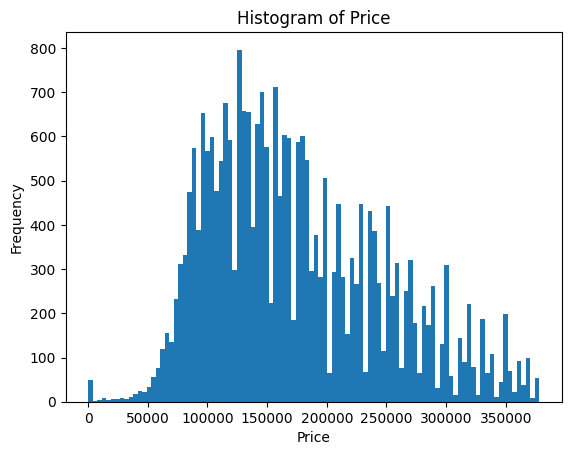

In [23]:
# hostgoram of price columns
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=100);
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

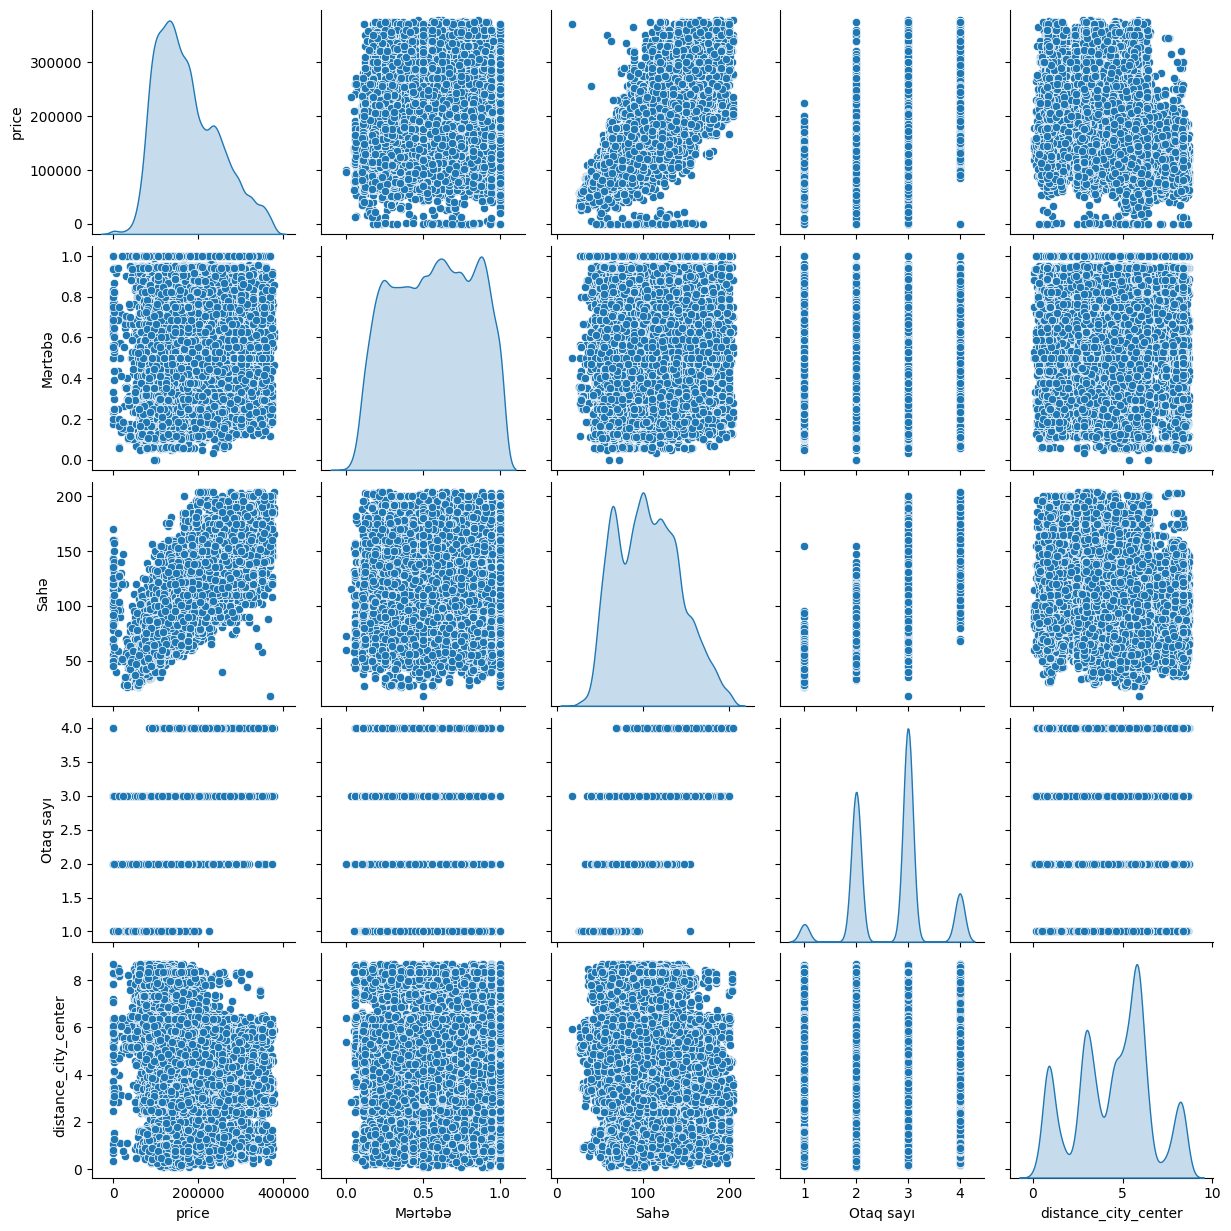

In [19]:
import seaborn as sns
# sns pariplot on specific columns
sns.pairplot(df[['price', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'distance_city_center']], diag_kind='kde')


In [20]:
df.describe()

,price,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,distance_city_center,rayon_Abşeron,rayon_Binəqədi,...,metro_Nəsimi,metro_Qara Qarayev,metro_Sahil,metro_Ulduz,metro_Xalqlar Dostluğu,metro_İnşaatçılar,metro_İçəri Şəhər,metro_Şah İsmayıl Xətai,metro_Əhmədli,seher_baki
count,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.00000,...,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.000000,26025.0
mean,174113.109164,0.080000,0.569860,106.284546,2.681575,0.733525,0.134870,4.450837,0.000115,0.05122,...,0.009645,0.057829,0.002152,0.000115,0.015793,0.126571,0.005610,0.144438,0.031470,1.0
std,73141.650274,0.271298,0.258436,36.442001,0.723816,0.442124,0.341592,2.134706,0.010736,0.22045,...,0.097734,0.233424,0.046338,0.010736,0.124674,0.332498,0.074691,0.351540,0.174587,0.0
min,10.000000,0.000000,0.000008,18.000000,1.000000,0.000000,0.000000,0.069265,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,117000.000000,0.000000,0.352941,75.000000,2.000000,0.000000,0.000000,2.941635,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,160000.000000,0.000000,0.578947,104.000000,3.000000,1.000000,0.000000,4.744881,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,225000.000000,0.000000,0.789474,132.000000,3.000000,1.000000,0.000000,5.850308,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,378000.000000,1.000000,1.000000,204.000000,4.000000,1.000000,1.000000,8.698583,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [65]:
# Function to remove outliers based on IQR
def remove_outliers(df, threshold=1):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR)))

    df_out = df[~(outliers.any(axis=1))]
    return df_out

features_to_check = ['Sahə', 'distance_city_center', 'Otaq sayı', 'price', 'Mərtəbə']

df_subset = df[features_to_check]
df_cleaned_subset = remove_outliers(df_subset)

df = df.loc[df_cleaned_subset.index]
df.shape

(26025, 44)

In [176]:
# apply z-score outlier removal
from scipy.stats import zscore

# df = df[(np.abs(zscore(df)) < 3).all(axis=1)]
# df.shape

(64902, 11)

In [214]:
df.columns

Index(['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça',
       'İpoteka', 'distance_city_center', 'rayon_Abşeron', 'rayon_Binəqədi',
       'rayon_Nizami', 'rayon_Nərimanov', 'rayon_Nəsimi', 'rayon_Qaradağ',
       'rayon_Sabunçu', 'rayon_Suraxanı', 'rayon_Səbail', 'rayon_Xətai',
       'rayon_Xəzər', 'rayon_Yasamal', 'metro_20 Yanvar', 'metro_28 May',
       'metro_Avtovağzal', 'metro_Azadlıq Prospekti', 'metro_Bakmil',
       'metro_Dərnəgül', 'metro_Elmlər Akademiyası', 'metro_Gənclik',
       'metro_Həzi Aslanov', 'metro_Koroğlu', 'metro_Memar Əcəmi',
       'metro_Neftçilər', 'metro_Nizami', 'metro_Nəriman Nərimanov',
       'metro_Nəsimi', 'metro_Qara Qarayev', 'metro_Sahil', 'metro_Ulduz',
       'metro_Xalqlar Dostluğu', 'metro_İnşaatçılar', 'metro_İçəri Şəhər',
       'metro_Şah İsmayıl Xətai', 'metro_Əhmədli', 'seher_baki'],
      dtype='object')

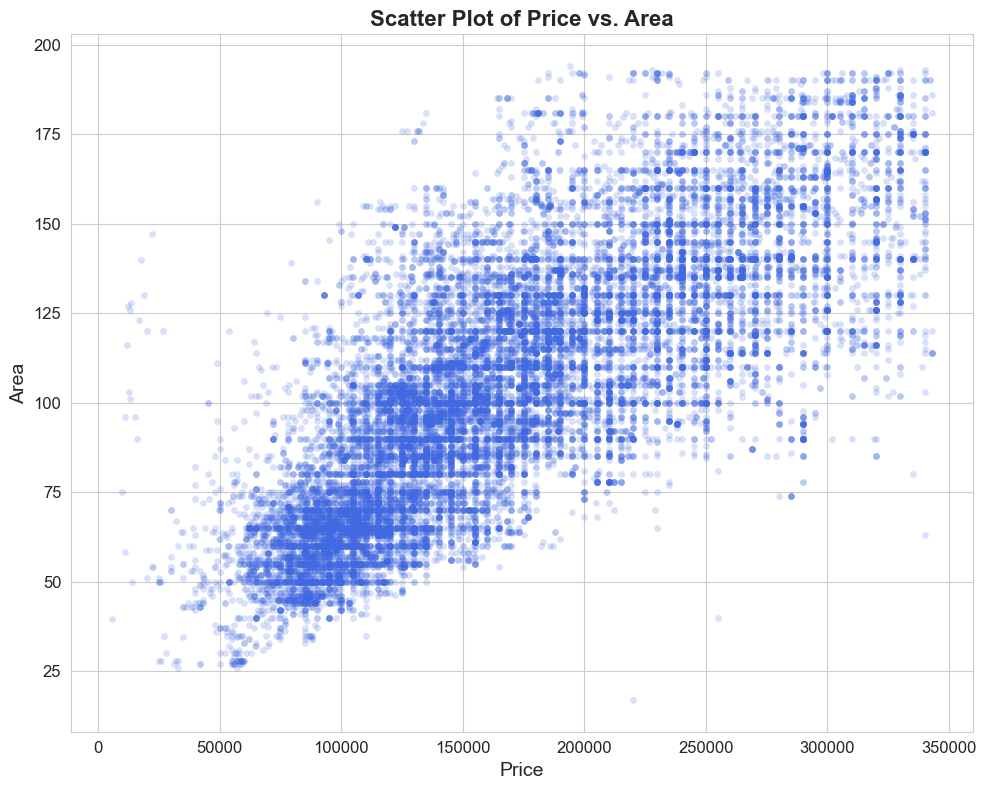

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

predictor_column = 'Sahə'
dependent_variable_column = 'price'

plt.figure(figsize=(10, 8))
plt.scatter(df[dependent_variable_column], df[predictor_column], alpha=0.2, s=20, color='royalblue',  linewidth=0.2)

sns.set_style("whitegrid") 
plt.title('Scatter Plot of Price vs. Area', fontsize=16, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.show()


In [218]:

import numpy as np
import scipy.stats as stats

class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X] # intercept term
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # normal equation

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X] # for intercept term
        return X.dot(self.coefficients)

    def rss(self, y, y_pred):
        return np.sum((y - y_pred) ** 2)
    
    def rmse(self, y, y_pred):
        return np.sqrt(np.mean((y - y_pred) ** 2))

    def standard_error(self, X, y, y_pred):
        n, p = X.shape # observations and predictors
        residual_std_error = np.sqrt(self.rss(y, y_pred) / (n - p - 1)) # rss
        X = np.c_[np.ones(X.shape[0]), X] # standard error for each coefficient
        se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.inv(X.T.dot(X))))
        return se

    def confidence_interval(self, coeff, se, alpha=0.05):
        t_crit = stats.t.ppf(1 - alpha/2, df=len(X) - len(coeff)) # critical value for two tails
        # confidence intervals
        lower_bound = coeff - t_crit * se
        upper_bound = coeff + t_crit * se
        return lower_bound, upper_bound

    def t_statistic(self, coeff, se):
        return coeff / se # for each coefficient

    def p_value(self, t_stat, n):
        return [2 * (1 - stats.t.cdf(np.abs(t), df=n-2)) for t in t_stat] #  p-value for each t-statistic

    def r_squared(self, y, y_pred):
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = self.rss(y, y_pred)
        return 1 - ss_res / ss_tot

    def correlation(self, X, y):
        return np.corrcoef(X.T, y)[0, 1] # Pearson correlation

X = df['Sahə'].values.reshape(-1, 1) # Predictor
y = df['price'].values # Target

np.random.seed(0) # For reproducibility
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_indices = indices[:split]
test_indices = indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Initializing and training the model
model = LinearRegressionFromScratch()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating metrics
rss = model.rss(y_test, y_pred_test)
rmse = model.rmse(y_test, y_pred_test)
se = model.standard_error(X_test, y_test, y_pred_test)
coeff_confidence_interval = model.confidence_interval(model.coefficients, se)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test))
r_squared_value = model.r_squared(y_test, y_pred_test)
correlation_value = model.correlation(X_test[:, 0], y_test)  # Only for single predictor
print(f'Coefficients: {model.coefficients}')
print(f'RSS: {rss}')
print(f'RMSE: {rmse}')
print(f'Standard Error: {se}')
print(f'Confidence Interval: {coeff_confidence_interval}')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_val}')
print(f'R-Squared: {r_squared_value}')
print(f'Correlation: {correlation_value}')


Coefficients: [12900.08058656  1497.74171075]
RSS: 8874116200072.938
RMSE: 41890.55157510048
Standard Error: [1854.33381657   16.90824291]
Confidence Interval: (array([9265.47907907, 1464.60057693]), array([16534.68209405,  1530.88284457]))
T-Statistic: [ 6.9567197  88.58056505]
P-Value: [3.9261927042844036e-12, 0.0]
R-Squared: 0.6053647528558667
Correlation: 0.7780673527578185


In [66]:
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures

class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X] 
        self.coefficients = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.coefficients)

    def rss(self, y, y_pred):
        return np.sum((y - y_pred) ** 2)
    
    def rmse(self, y, y_pred):
        return np.sqrt(np.mean((y - y_pred) ** 2))

    def standard_error(self, X, y, y_pred):
        n, p = X.shape
        residual_std_error = np.sqrt(self.rss(y, y_pred) / (n - p - 1))
        X = np.c_[np.ones(X.shape[0]), X]
        se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.pinv(X.T.dot(X))))
        return se

    def t_statistic(self, coeff, se):
        return coeff / se

    def p_value(self, t_stat, n):
        return [2 * (1 - stats.t.cdf(np.abs(t), df=n-2)) for t in t_stat]

    def r_squared(self, y, y_pred):
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = self.rss(y, y_pred)
        return 1 - ss_res / ss_tot

    def fit_interactions(self, X):
        poly = PolynomialFeatures(interaction_only=True, include_bias=False)
        X_interact = poly.fit_transform(X)
        return X_interact

    def fit_polynomial(self, X, degree=2):
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X)
        return X_poly

import numpy as np
import pandas as pd

X = df.drop('price', axis=1).values 
y = df['price'].values
    
np.random.seed(0) 
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_indices, test_indices = indices[:split], indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

model = LinearRegressionFromScratch()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rss = model.rss(y_test, y_pred_test)
print(f"Residual Sum of Squares (RSS): {rss}")

rmse = model.rmse(y_test, y_pred_test)
print(f"Root Mean Squared Error (RMSE): {rmse}")

se = model.standard_error(X_test, y_test, y_pred_test)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test))
print(f"Standard Errors: {se}")
print(f"T-statistics: {t_stat}")
print(f"P-values: {p_val}")

r_squared_value = model.r_squared(y_test, y_pred_test)
print(f"R-squared: {r_squared_value}")

Residual Sum of Squares (RSS): 7017556586300.072
Root Mean Squared Error (RMSE): 36718.30244114611
Standard Errors: [5.23304956e+03 1.90451690e+03 1.99124811e+03 2.42441485e+01
 1.19151193e+03 1.24110173e+03 1.56883098e+03 1.98317087e+03
 1.37603294e-09 8.80344515e+03 1.00844674e+04 8.06602367e+03
 7.42245752e+03 3.53834085e+04 1.50123172e+04 3.44345172e+04
 1.21655139e+04 9.27046010e+03 3.48361583e+04 7.82641079e+03
 5.12621086e+03 5.16538463e+03 1.10849884e+04 7.55078143e+03
 1.24406226e+04 1.15837783e+04 5.75641741e+03 7.88583956e+03
 1.09663198e+04 2.21487663e+04 4.70568778e+03 9.94332671e+03
 5.19017107e+03 8.71457406e+03 7.94900958e+03 9.30440630e+03
 1.19245984e+04            nan 1.05142683e+04 5.71684972e+03
 1.15962596e+04 8.38063046e+03 1.07539524e+04 5.23304972e+03]
T-statistics: [-2.23051841e+00 -1.92331189e-01 -1.53195877e+00  4.84594698e+01
  1.04881628e+01  1.29811107e+01 -4.45314112e+00  1.79769514e+00
 -3.15031079e+13  1.06628168e+00  8.76558728e-01  1.10952389e+00
  2

/var/folders/ls/65g9k4kd4_j8k3x277xdkd500000gn/T/ipykernel_45702/1339143194.py:27: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.pinv(X.T.dot(X))))


Useful Predictors: ['price', 'Sahə', 'Otaq sayı', 'Kupça', 'İpoteka', 'rayon_Abşeron', 'rayon_Nəsimi', 'rayon_Yasamal', 'metro_20 Yanvar', 'metro_28 May', 'metro_Avtovağzal', 'metro_Elmlər Akademiyası', 'metro_Gənclik', 'metro_Həzi Aslanov', 'metro_Memar Əcəmi', 'metro_Neftçilər', 'metro_Nizami', 'metro_Nəriman Nərimanov', 'metro_Nəsimi', 'metro_Qara Qarayev', 'metro_Sahil', 'metro_Xalqlar Dostluğu', 'metro_İnşaatçılar', 'metro_İçəri Şəhər', 'metro_Şah İsmayıl Xətai', 'metro_Əhmədli', 'seher_baki']


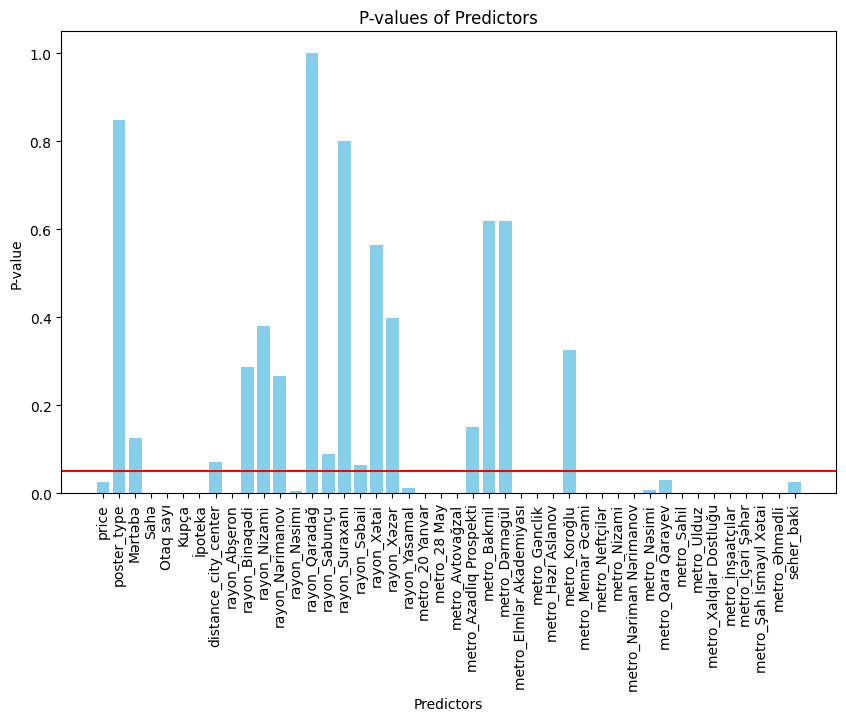

In [67]:
# find which predictors are useful, feature with lower than 0.05 p-value are useful
useful_predictors = [col for col, p in zip(df.columns, p_val) if p < 0.05]
print(f"Useful Predictors: {useful_predictors}")

# plot barplot for the pvalue
plt.figure(figsize=(10, 6))
plt.bar(df.columns, p_val, color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.xlabel('Predictors')
plt.ylabel('P-value')
plt.title('P-values of Predictors')
plt.xticks(rotation=90)
plt.show()


In [50]:
df.columns

Index(['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça',
       'İpoteka', 'distance_city_center', 'rayon_Abşeron', 'rayon_Binəqədi',
       'rayon_Nizami', 'rayon_Nərimanov', 'rayon_Nəsimi', 'rayon_Qaradağ',
       'rayon_Sabunçu', 'rayon_Suraxanı', 'rayon_Səbail', 'rayon_Xətai',
       'rayon_Xəzər', 'rayon_Yasamal', 'metro_20 Yanvar', 'metro_28 May',
       'metro_Avtovağzal', 'metro_Azadlıq Prospekti', 'metro_Bakmil',
       'metro_Dərnəgül', 'metro_Elmlər Akademiyası', 'metro_Gənclik',
       'metro_Həzi Aslanov', 'metro_Koroğlu', 'metro_Memar Əcəmi',
       'metro_Neftçilər', 'metro_Nizami', 'metro_Nəriman Nərimanov',
       'metro_Nəsimi', 'metro_Qara Qarayev', 'metro_Sahil', 'metro_Ulduz',
       'metro_Xalqlar Dostluğu', 'metro_İnşaatçılar', 'metro_İçəri Şəhər',
       'metro_Şah İsmayıl Xətai', 'metro_Əhmədli', 'seher_baki'],
      dtype='object')

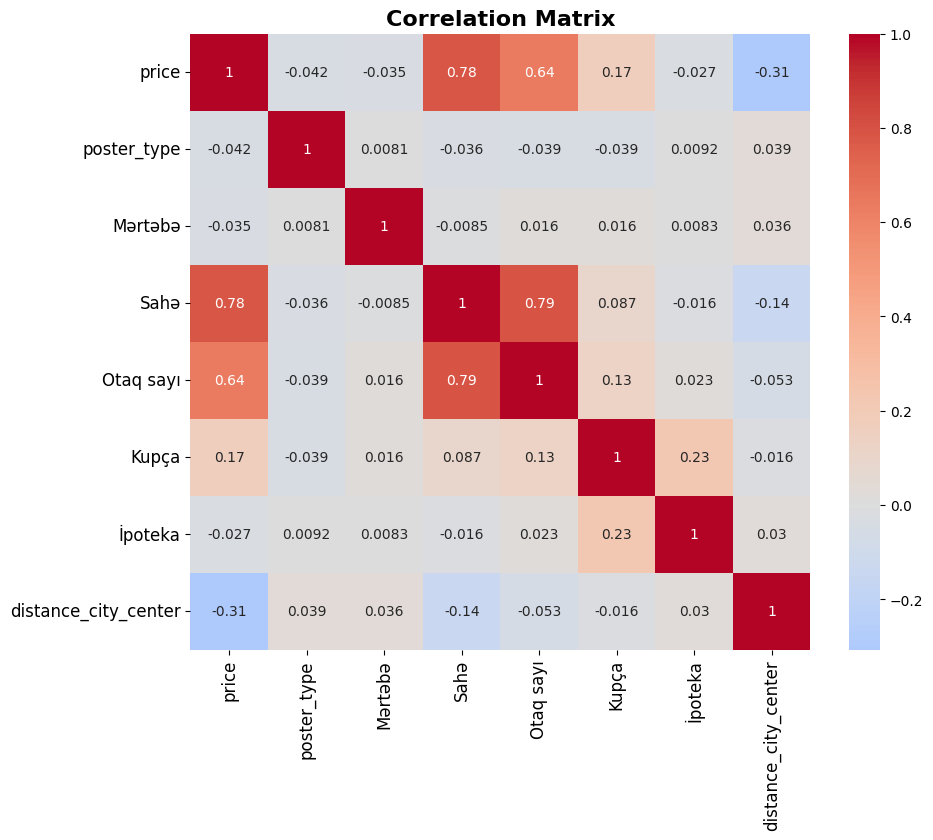

In [51]:
# correlations between the features and with headmap on dataframe
correlation_matrix = df[['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça', 'İpoteka', 'distance_city_center']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [35]:
len(useful_predictors)

27

Rank 1: metro_İçəri Şəhər
Rank 2: metro_Sahil
Rank 3: metro_Nizami
Rank 4: metro_28 May
Rank 5: metro_Elmlər Akademiyası
Rank 6: metro_Şah İsmayıl Xətai
Rank 7: metro_Gənclik
Rank 8: metro_Nəriman Nərimanov
Rank 9: metro_Ulduz
Rank 10: metro_Koroğlu
Rank 11: metro_Dərnəgül
Rank 12: metro_İnşaatçılar
Rank 13: metro_Bakmil
Rank 14: metro_Memar Əcəmi
Rank 15: metro_Nəsimi
Rank 16: metro_Azadlıq Prospekti
Rank 17: metro_20 Yanvar
Rank 18: metro_Qara Qarayev
Rank 19: metro_Neftçilər
Rank 20: metro_Avtovağzal
Rank 21: metro_Xalqlar Dostluğu
Rank 22: metro_Həzi Aslanov
Rank 23: metro_Əhmədli
Rank 24: rayon_Abşeron
Rank 25: rayon_Suraxanı
Rank 26: rayon_Sabunçu
Rank 27: rayon_Xətai
Rank 28: rayon_Nizami
Rank 29: rayon_Xəzər
Rank 30: rayon_Nərimanov
Rank 31: rayon_Binəqədi
Rank 32: rayon_Səbail
Rank 33: rayon_Yasamal
Rank 34: rayon_Nəsimi
Rank 35: Otaq sayı
Rank 36: Kupça
Rank 37: İpoteka
Rank 38: Mərtəbə
Rank 39: distance_city_center
Rank 40: Sahə
Rank 41: poster_type
Rank 42: rayon_Qaradağ
Ra

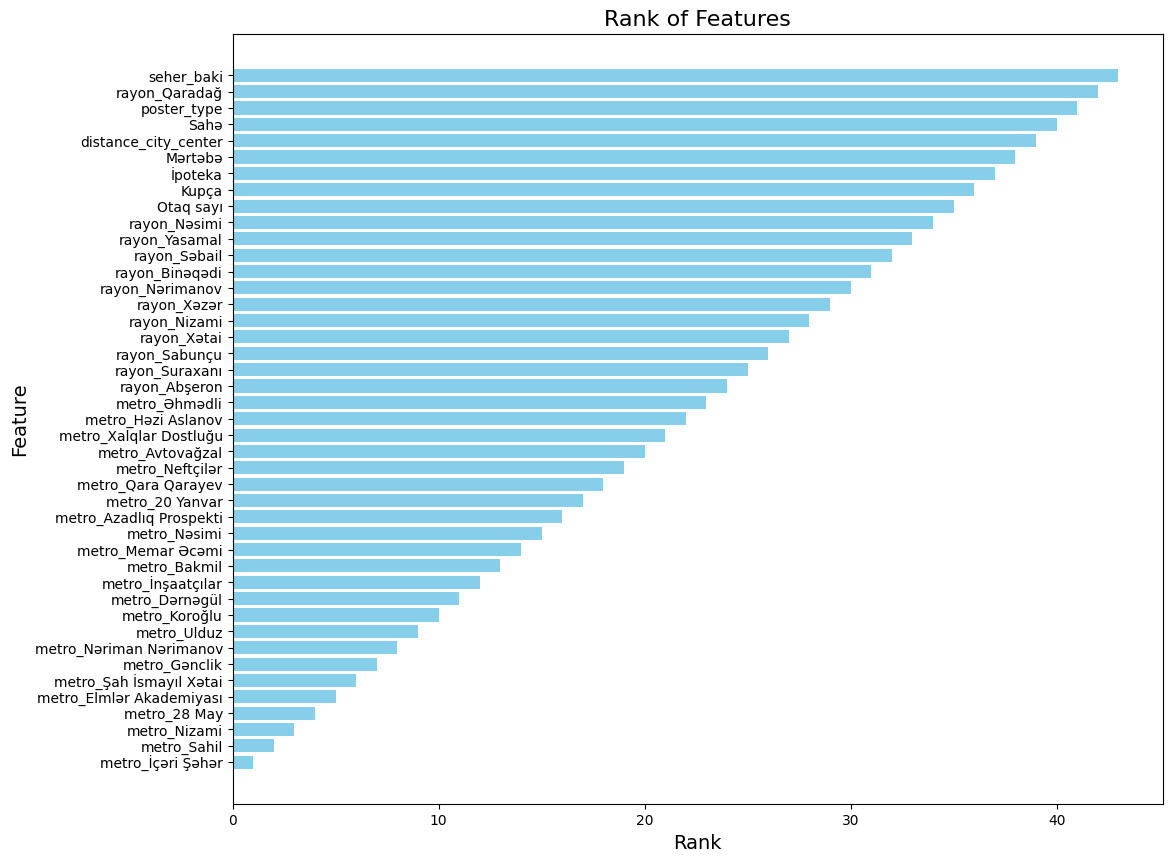

In [38]:
# apply backward elimination to find useful predictors

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df.drop('price', axis=1).values 
y = df['price'].values

np.random.seed(0) 
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))  # 80% training, 20% testing
train_indices, test_indices = indices[:split], indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1) 

rfe.fit(X_train, y_train)

ranked_features = rfe.ranking_

feature_names = df.drop('price', axis=1).columns

ranked_features_with_names = sorted(zip(ranked_features, feature_names))

for i, (rank, feature) in enumerate(ranked_features_with_names, 1):
    print(f"Rank {i}: {feature}")

import matplotlib.pyplot as plt

ranked_features_with_names = sorted(zip(ranked_features, feature_names))

features = [feature for rank, feature in ranked_features_with_names]
ranks = [rank for rank, feature in ranked_features_with_names]

plt.figure(figsize=(12, 10))
plt.barh(features, ranks, color='skyblue')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Rank of Features', fontsize=16)
plt.show()



In [40]:
df.columns

Index(['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça',
       'İpoteka', 'distance_city_center', 'rayon_Abşeron', 'rayon_Binəqədi',
       'rayon_Nizami', 'rayon_Nərimanov', 'rayon_Nəsimi', 'rayon_Qaradağ',
       'rayon_Sabunçu', 'rayon_Suraxanı', 'rayon_Səbail', 'rayon_Xətai',
       'rayon_Xəzər', 'rayon_Yasamal', 'metro_20 Yanvar', 'metro_28 May',
       'metro_Avtovağzal', 'metro_Azadlıq Prospekti', 'metro_Bakmil',
       'metro_Dərnəgül', 'metro_Elmlər Akademiyası', 'metro_Gənclik',
       'metro_Həzi Aslanov', 'metro_Koroğlu', 'metro_Memar Əcəmi',
       'metro_Neftçilər', 'metro_Nizami', 'metro_Nəriman Nərimanov',
       'metro_Nəsimi', 'metro_Qara Qarayev', 'metro_Sahil', 'metro_Ulduz',
       'metro_Xalqlar Dostluğu', 'metro_İnşaatçılar', 'metro_İçəri Şəhər',
       'metro_Şah İsmayıl Xətai', 'metro_Əhmədli', 'seher_baki'],
      dtype='object')

In [43]:

X = df.drop('price', axis=1).values
y = df['price'].values

np.random.seed(0) 
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))  
train_indices, test_indices = indices[:split], indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

top_10_features = ['seher_baki',  'rayon_Qaradağ', 'poster_type', 'Sahə', 'distance_city_center', 'Mərtəbə', 'Otaq sayı', 'Kupça', 'İpoteka', 'rayon_Nəsimi']

X_train_top_10 = df[top_10_features].values[train_indices]
X_test_top_10 = df[top_10_features].values[test_indices]

model = LinearRegression()
model.fit(X_train_top_10, y_train)

y_pred_train = model.predict(X_train_top_10)
y_pred_test = model.predict(X_test_top_10)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 42424.67098878871


In [28]:

X_train_interact = model.fit_interactions(X_train)
X_test_interact = model.fit_interactions(X_test)
model.fit(X_train_interact, y_train) 
degree = 2
X_train_poly = model.fit_polynomial(X_train, degree)
X_test_poly = model.fit_polynomial(X_test, degree)
model.fit(X_train_poly, y_train) 

y_pred_test = model.predict(X_test_poly)
rss = model.rss(y_test, y_pred_test)
rmse = model.rmse(y_test, y_pred_test)
se = model.standard_error(X_test_poly, y_test, y_pred_test)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test_poly))
r_squared_value = model.r_squared(y_test, y_pred_test)
# print(f'Coefficients: {model.coefficients}')
print(f'RSS: {rss}')
print(f'RMSE: {rmse}')
# print(f'Standard Error: {se}')
# print(f'T-Statistic: {t_stat}')
# print(f'P-Value: {p_val}')
print(f'R-Squared: {r_squared_value}')

RSS: 6307179433659.83
RMSE: 34810.25673283556
R-Squared: 0.7722580272019622


/var/folders/ls/65g9k4kd4_j8k3x277xdkd500000gn/T/ipykernel_45702/871314996.py:29: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.pinv(X.T.dot(X))))
/var/folders/ls/65g9k4kd4_j8k3x277xdkd500000gn/T/ipykernel_45702/871314996.py:33: RuntimeWarning: divide by zero encountered in divide
  return coeff / se
/var/folders/ls/65g9k4kd4_j8k3x277xdkd500000gn/T/ipykernel_45702/871314996.py:33: RuntimeWarning: invalid value encountered in divide
  return coeff / se


In [44]:
X_train_interact = model.fit_interactions(X_train)
X_test_interact = model.fit_interactions(X_test)
model.fit(X_train_interact, y_train) 

y_pred_test = model.predict(X_test_interact)
rss = model.rss(y_test, y_pred_test)
rmse = model.rmse(y_test, y_pred_test)
se = model.standard_error(X_test_interact, y_test, y_pred_test)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test_interact))
r_squared_value = model.r_squared(y_test, y_pred_test)
# print(f'Coefficients: {model.coefficients}')
print(f'RSS: {rss}')
print(f'RMSE: {rmse}')
# print(f'Standard Error: {se}')
# print(f'T-Statistic: {t_stat}')
# print(f'P-Value: {p_val}')
print(f'R-Squared: {r_squared_value}')

AttributeError: 'LinearRegression' object has no attribute 'fit_interactions'

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)

y_pred_test = model.predict(X_test_scaled)

rss = mean_squared_error(y_test, y_pred_test) * len(y_test)
print(f"Residual Sum of Squares (RSS): {rss}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Residual Sum of Squares (RSS): 5638170789941.691
Root Mean Squared Error (RMSE): 33390.47804559625


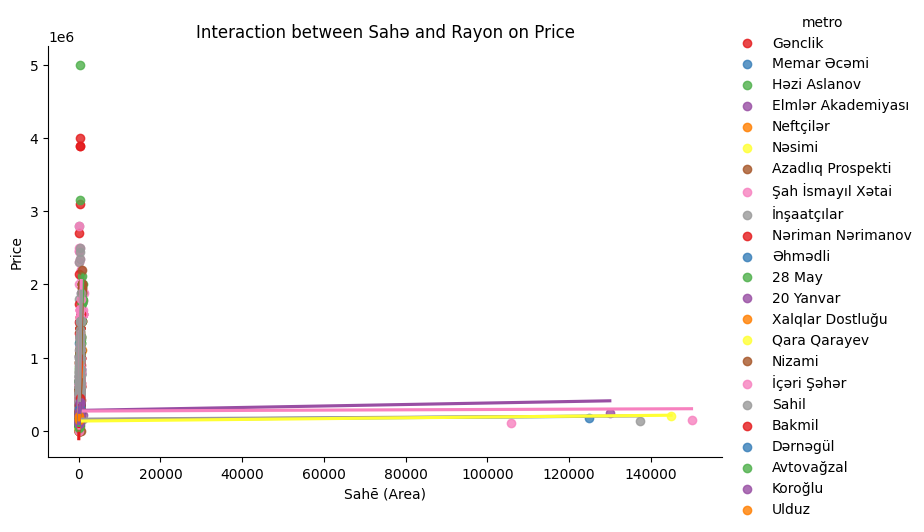

In [55]:
# Analyze Interactions between qualitative and quantitative Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rayon' is the qualitative variable and 'Sahə' is the quantitative variable
sns.lmplot(x='Sahə', y='price', hue='metro', data=df, aspect=1.5, ci=None, palette='Set1')

plt.title('Interaction between Sahə and Rayon on Price')
plt.xlabel('Sahē (Area)')
plt.ylabel('Price')
plt.show()


In [57]:
# install statsmodels
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 558.4 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 557.8 kB/s eta 0:00:00a 0:00:01


In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Encoding the categorical variable if not already done
df_encoded = pd.get_dummies(df, columns=['metro'], drop_first=True)

# Constructing the formula for the OLS model: 'target ~ C(qualitative_var) * quantitative_var'
formula = 'price ~ Sahə * rayon'

# Fitting the model
model = smf.ols(formula=formula, data=df).fit()

# Printing the summary to analyze the interaction effects
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     284.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:37:12   Log-Likelihood:            -3.9596e+05
No. Observations:               29512   AIC:                         7.920e+05
Df Residuals:                   29489   BIC:                         7.922e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Encoding the categorical variable if not already done
df_encoded = pd.get_dummies(df, columns=['metro'], drop_first=True)

# Constructing the formula for the OLS model: 'target ~ C(qualitative_var) * quantitative_var'
formula = 'price ~ Sahə * rayon'

# Fitting the model
model = smf.ols(formula=formula, data=df).fit()

# Printing the summary to analyze the interaction effects
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     284.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:37:26   Log-Likelihood:            -3.9596e+05
No. Observations:               29512   AIC:                         7.920e+05
Df Residuals:                   29489   BIC:                         7.922e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -